## Processing Sept SW Cruise CTD data

In [2]:
! pip install seabird

In [8]:
from seabird.cnv import fCNV
from gsw import z_from_p
import numpy as np
from matplotlib import pyplot as plt


In [3]:
! ls data/sept_cruise/processed_ctd/

20210904decktest.cnv  T1C2.cnv	T6C1.cnv  T9C1.cnv
T1C1.cnv	      T1C3.cnv	T6C2.cnv  T9C2.cnv


In [46]:
t1c1 = fCNV('data/sept_cruise/processed_ctd/T1C1.cnv')
t1c2 = fCNV('data/sept_cruise/processed_ctd/T1C2.cnv')
t1c3 = fCNV('data/sept_cruise/processed_ctd/T1C3.cnv')

t6c1 = fCNV('data/sept_cruise/processed_ctd/T6C1.cnv')
t6c2 = fCNV('data/sept_cruise/processed_ctd/T6C2.cnv')

t9c1 = fCNV('data/sept_cruise/processed_ctd/T9C1.cnv')
t9c2 = fCNV('data/sept_cruise/processed_ctd/T9C2.cnv')

# these are ordered so they are shelf - eddy/GS
transects = [[t1c1,t1c2,t1c3],[t6c1,t6c2],[t9c2,t9c1]]

In [47]:
print("Header: %s" % transects[0][0].attributes.keys())
print("Data: %s" % transects[0][0].keys())

Header: dict_keys(['sbe_model', 'seasave', 'instrument_type', 'nquan', 'nvalues', 'start_time', 'bad_flag', 'file_type', 'md5', 'datetime', 'filename'])
Data: ['density', 'potemperature', 'PSAL', 'flECO-AFL', 'DEPTH', 'sbeopoxMm/Kg', 'sbeopoxPS', 'par/sat/log', 'ph', 'turbWETntu0', 'flag']


---------------------------------------------------------------------------------------
T1C1.cnv
T1C2.cnv
T1C3.cnv


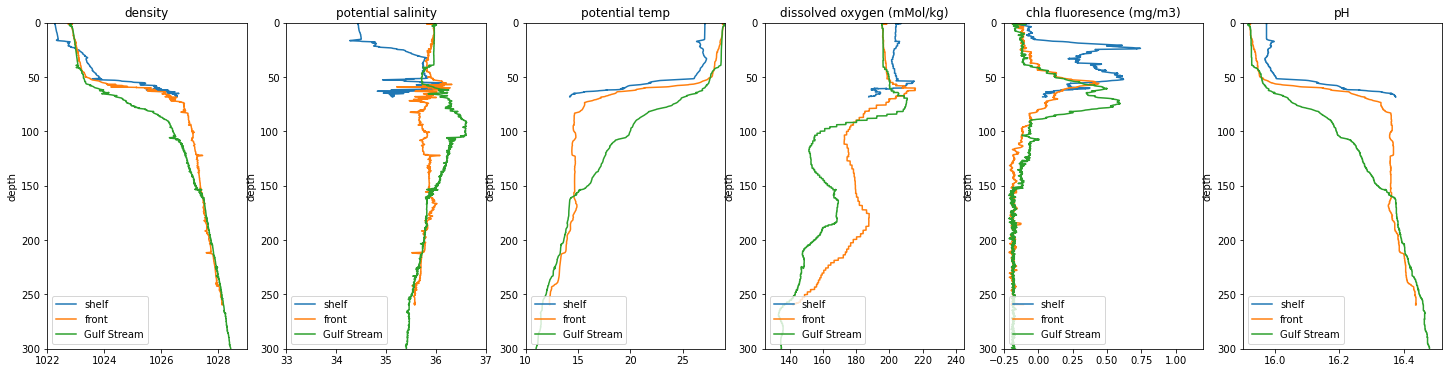

---------------------------------------------------------------------------------------
T6C1.cnv
T6C2.cnv


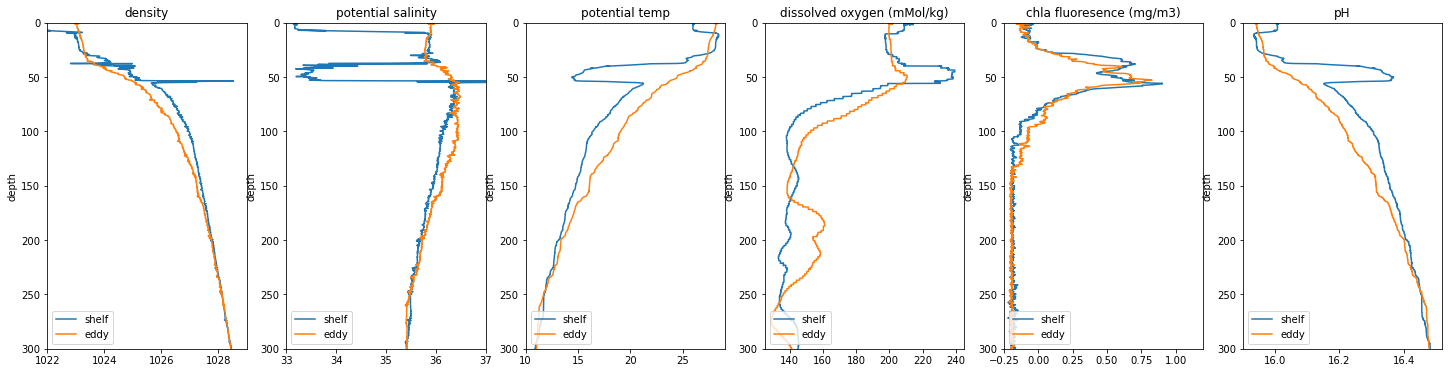

---------------------------------------------------------------------------------------
T9C2.cnv
T9C1.cnv


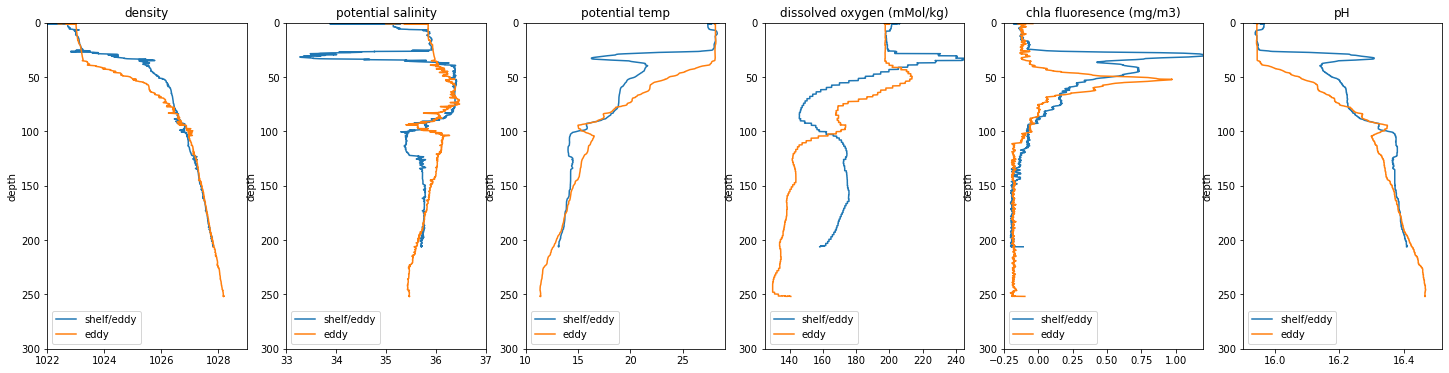

In [53]:
colors=['blue','red', 'orange']

ctd_vars = ['density','PSAL', 'potemperature', 'sbeopoxMm/Kg', 'flECO-AFL','ph']
names = ['density','potential salinity', 'potential temp', 'dissolved oxygen (mMol/kg)', 'chla fluoresence (mg/m3)', 'pH']
labels = [['shelf', 'front', 'Gulf Stream'], ['shelf', 'eddy'],['shelf/eddy', 'eddy']]

lims = [[1022,1029],[33,37],[10,29],[125,245],[-0.25,1.2],[15.9,16.52]]

for oidx, transect in enumerate(transects):

    fig, ax = plt.subplots(1,6,figsize=(25,6))    
    
    print('---------------------------------------------------------------------------------------')
    for profile in transect:
        print(profile.attributes['filename'])
    

    for i, a in enumerate([ax[0],ax[1],ax[2],ax[3],ax[4],ax[5]]):
        
        for j, profile in enumerate(transect):
            var_to_plot = profile[ctd_vars[i]]
            if ctd_vars[i] == 'flECO-AFL' or ctd_vars[i] == 'turbWETntu0':
                w=9
                var_to_plot = np.convolve(var_to_plot, np.ones(w), 'same') / w
            if ctd_vars[i] == 'par/sat/log':
                var_to_plot = var_to_plot.data / np.mean(var_to_plot.data[:10])
            a.plot(var_to_plot, profile['DEPTH'], alpha=1, label=labels[oidx][j])
            # plt.plot(profile['TEMP2'], z,'g')
    #         a.set_xlabel('temperature')
            a.set_ylabel('depth')
            a.set_ylim(300,0)
            a.set_xlim(lims[i][0],lims[i][1])
            if ctd_vars[i] == 'par/sat/log':
                a.set_xscale('log')
            a.set_title(names[i])
        a.legend(loc='lower left')
    plt.show()

array([1.03404831e+00, 1.10417563e+00, 9.66046443e-01, ...,
       4.76256325e-04, 4.76256325e-04, 4.76256325e-04])

78.1008